

## Question 2. 

A team of plantation planners are concerned about the yield of oil palm trees, which seems to fluctuate. 
They have collected a set of data and needed help in analysing on how external factors influence fresh 
fruit bunch (FFB) yield. Some experts are of opinion that the flowering of oil palm tree determines
the FFB yield, and are linked to the external factors. Perform the analysis, which requires some study on 
the background of oil palm tree physiology.

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [16]:
#Load the data
df= pd.read_csv('palm_ffb.csv')
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
Date             130 non-null object
SoilMoisture     130 non-null float64
Average_Temp     130 non-null float64
Min_Temp         130 non-null float64
Max_Temp         130 non-null float64
Precipitation    130 non-null float64
Working_days     130 non-null int64
HA_Harvested     130 non-null float64
FFB_Yield        130 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


There are no missing data 

In [18]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [19]:
#change the data format
df['Date'] = pd.to_datetime(df['Date'])

## Exploratory Data Analysis

### Univariate Analysis

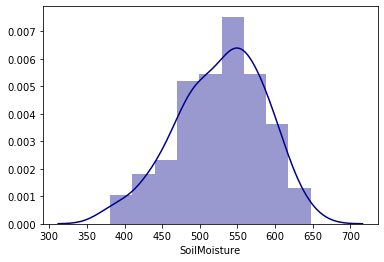

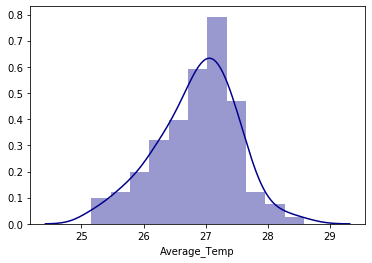

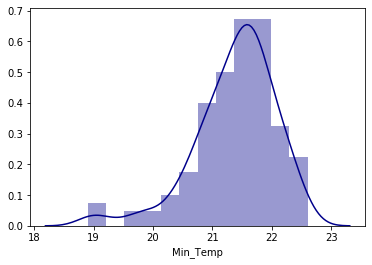

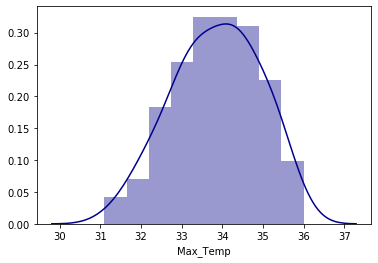

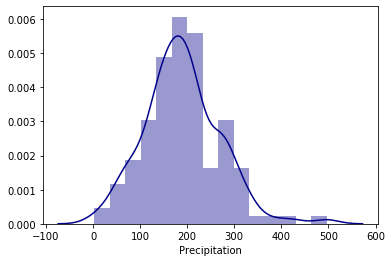

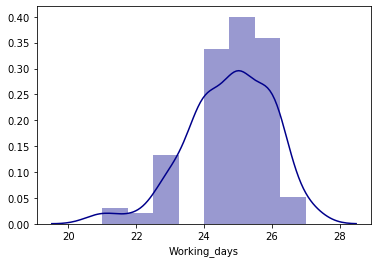

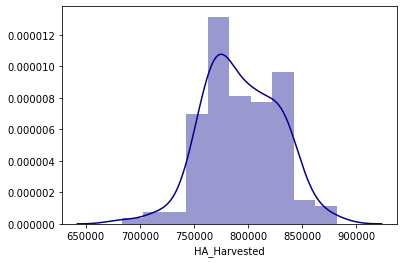

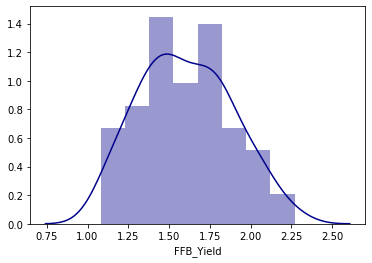

<Figure size 432x288 with 0 Axes>

In [20]:
for item in df.columns.drop(['Date']):
    sns.distplot(df[item], color='darkblue')
    plt.show()
    plt.tight_layout()

It is apparent that most of our features follow normal distribution

### Bivariate Analysis

we will see the plot between features and target variable 

In [21]:
import plotly.express as px

fig = px.scatter(df, y="FFB_Yield", x="SoilMoisture", title='FFB Yield based on Soil Moisture',
                 width=700, height=400)
fig.show()
fig = px.scatter(df, y="FFB_Yield", x="Average_Temp", title='FFB Yield based on Average Temp',
                 width=700, height=400)
fig.show()
fig = px.scatter(df, y="FFB_Yield", x="Min_Temp", title='FFB Yield based on Min Temp',
                 width=700, height=400)
fig.show()
fig = px.scatter(df, y="FFB_Yield", x="Max_Temp", title='FFB Yield based on Max Temp',
                 width=700, height=400)
fig.show()
fig = px.scatter(df, y="FFB_Yield", x="Precipitation", title='FFB Yield based on Precipitation',
                 width=700, height=400)
fig.show()
fig = px.scatter(df, y="FFB_Yield", x="HA_Harvested", title='FFB Yield based on HA Harvested',
                 width=700, height=400)
fig.show()


One interesting observation is between 'Percipitation' and 'FFB Yield'. In this figure we can see that the dots drawing a positive and linear line indicating that there is a positive relationship between these variables 

#### FFB Yield based on Working Days

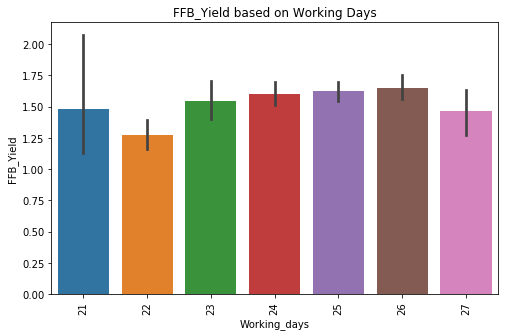

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x=df.Working_days,y=df.FFB_Yield)
plt.xticks(rotation=90)
plt.ylabel('FFB_Yield')
plt.title('FFB_Yield based on Working Days')
plt.show()

We can't see a clear pattern between the 'FFB_Yield' and 'working days' features. However, from  23  until 26 working days the FFB_yield is increasing, although the proportion is not significant.  

### Correlation between features and target variable

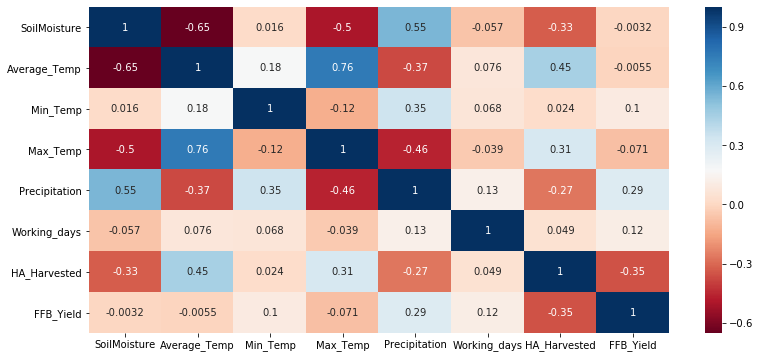

In [23]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(method='pearson'),cmap='RdBu', annot=True)
plt.show()

From the heatmap plot we can se the correlation between 'FFB_yield' and 'Perciptation' is the highest and positive. 
meaning that as one gets larger, the other gets larger. Meanwhile the correlation between 'FFB_yield' and 'Soil_Moisture', 
'FFB_yield' dand 'Average_Temp' is negative and close to 0, meaning that there is low degree of correlation between these variables. If we take a look at 'Soil_Moisture' and 'Average_Temp' features, it can be seen how significant the correlation is between these variables, the correlation is strong, that indicates a situation of multicollinearity, in other word, they give almost the same information 


## Feature Importance 

Now, let's do a linear regression to see the relationship between all features and FFB_yield and gain the information of the important feature which affect FFB yield. I will drop a feature that has tendecy of multicollinearity.  

In [24]:
#Standardize the data
sc= StandardScaler()
data_scaled = sc.fit_transform(df[['FFB_Yield','SoilMoisture','Precipitation',
                                   'Min_Temp','Max_Temp','Working_days','HA_Harvested']])

data_scaled = pd.DataFrame(data_scaled,columns=['FFB_Yield','SoilMoisture','Precipitation',
                                                 'Min_Temp','Max_Temp','Working_days','HA_Harvested'])

#set target and features
y= data_scaled['FFB_Yield']
features= ['SoilMoisture','Precipitation','Min_Temp','Max_Temp','Working_days','HA_Harvested']
x= data_scaled[features]

#split data to train and test  
X_train, X_test, y_train, y_test = train_test_split(x, y ,test_size = 0.2,random_state=101)



In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)

# summarize feature importance
print('intercept: %.5f' % (model.intercept_))
importance = model.coef_
for i,v in enumerate(importance):
      print('Feature: %0d, Score: %.5f' % (i,v))    


intercept: -0.00151
Feature: 0, Score: -0.35309
Feature: 1, Score: 0.37999
Feature: 2, Score: 0.02083
Feature: 3, Score: 0.05135
Feature: 4, Score: 0.03025
Feature: 5, Score: -0.40037


Findings: 

The three important variables are HA_Harvested, Precipitation and SoilMoisture
    
1. HA_Harvested is negatively associated with FFB_Yield and has the highest score. 
2. Percipitation has the positive and high score. 
3. The score for SoilMoisture is negative and also high.